In [7]:
# pip install yfinance

In [9]:
import yfinance as yf

In [11]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [13]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [15]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-12-06 00:00:00+00:00,4.380035,4.390792,4.500631,4.384067,4.461527,251097661
2004-12-07 00:00:00+00:00,4.259285,4.269746,4.388551,4.247828,4.383569,275866153
2004-12-08 00:00:00+00:00,4.223259,4.233631,4.325786,4.202498,4.242847,302802741
2004-12-09 00:00:00+00:00,4.308977,4.319559,4.321303,4.196022,4.240356,307307563
2004-12-10 00:00:00+00:00,4.264751,4.275225,4.355674,4.266259,4.319559,173335277


In [17]:
google_data.shape

(5036, 6)

In [19]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,47.987562,48.097717,48.582396,47.598245,48.078221,1.099022e+08
std,45.854525,45.946596,46.419972,45.469171,45.920150,1.425739e+08
min,4.223259,4.233631,4.313333,4.196022,4.240356,1.584340e+05
25%,13.264273,13.296848,13.411667,13.153385,13.303573,2.662350e+07
50%,27.847101,27.915488,28.172651,27.695212,27.954002,5.151820e+07
75%,63.079837,63.234751,63.967500,62.556611,63.214126,1.339934e+08
max,192.406723,192.660004,193.309998,190.619995,191.750000,1.650833e+09


In [21]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2004-12-06 00:00:00+00:00 to 2024-12-06 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5036 non-null   float64
 1   (Close, GOOG)      5036 non-null   float64
 2   (High, GOOG)       5036 non-null   float64
 3   (Low, GOOG)        5036 non-null   float64
 4   (Open, GOOG)       5036 non-null   float64
 5   (Volume, GOOG)     5036 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [23]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

Text(0.5, 1.0, 'Closing price of Google data')

In [39]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show()
    plt.close()

In [29]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

<Figure size 1500x500 with 0 Axes>

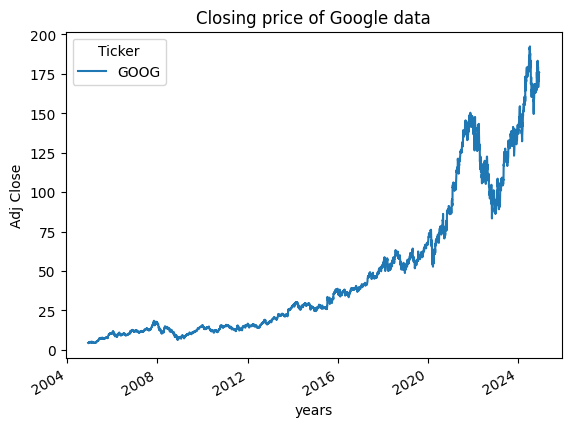

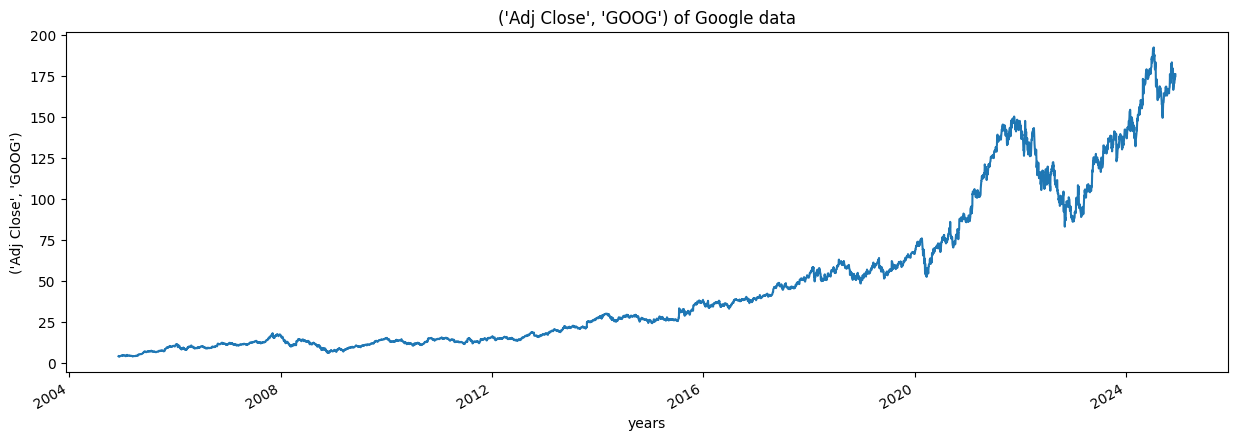

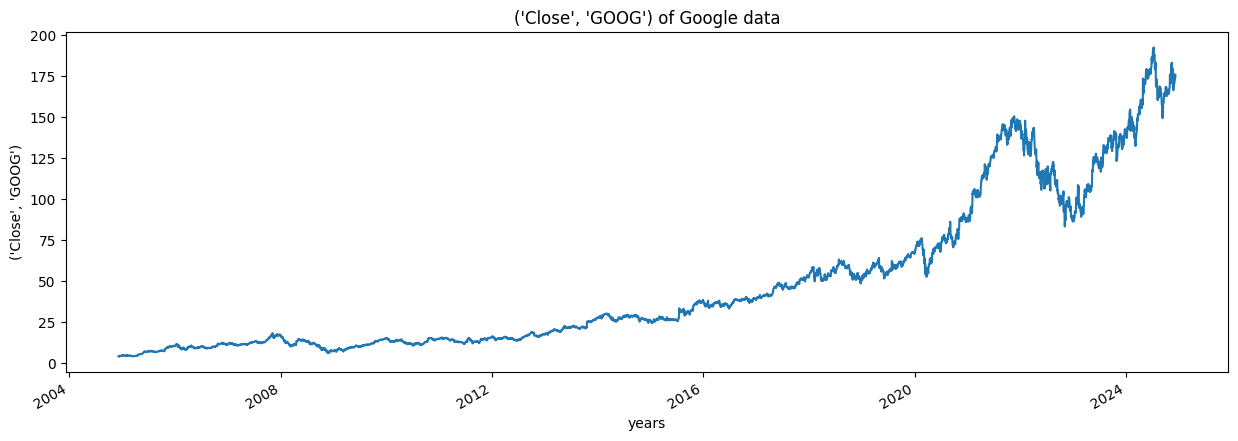

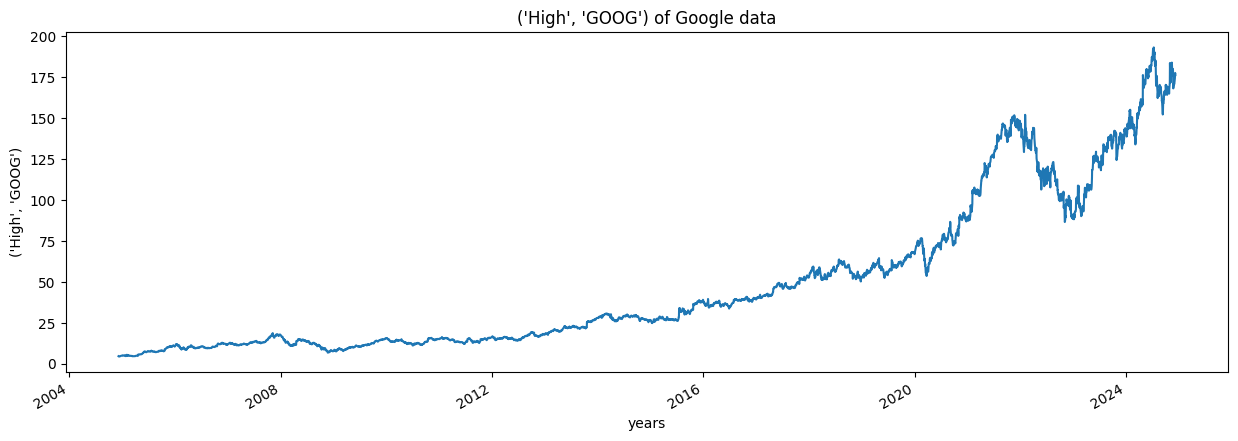

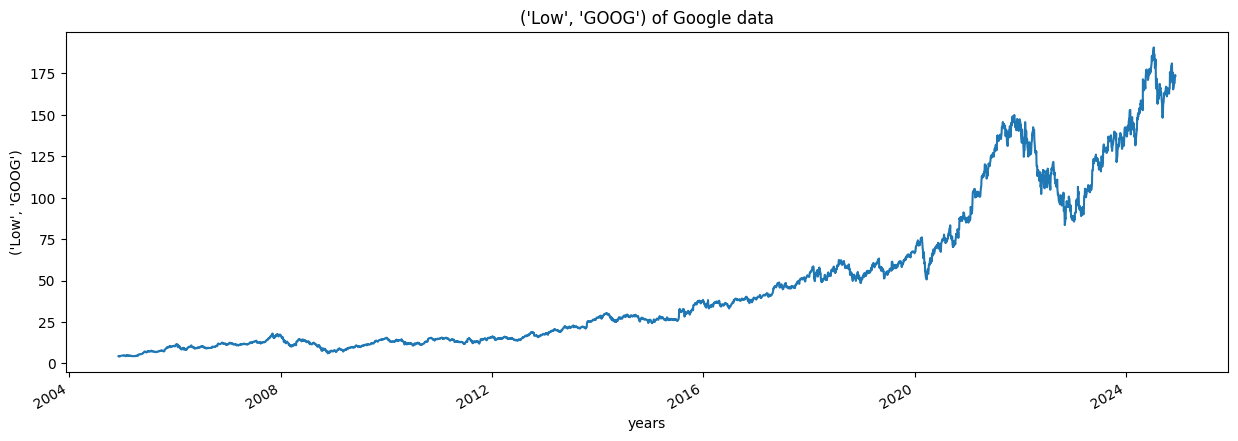

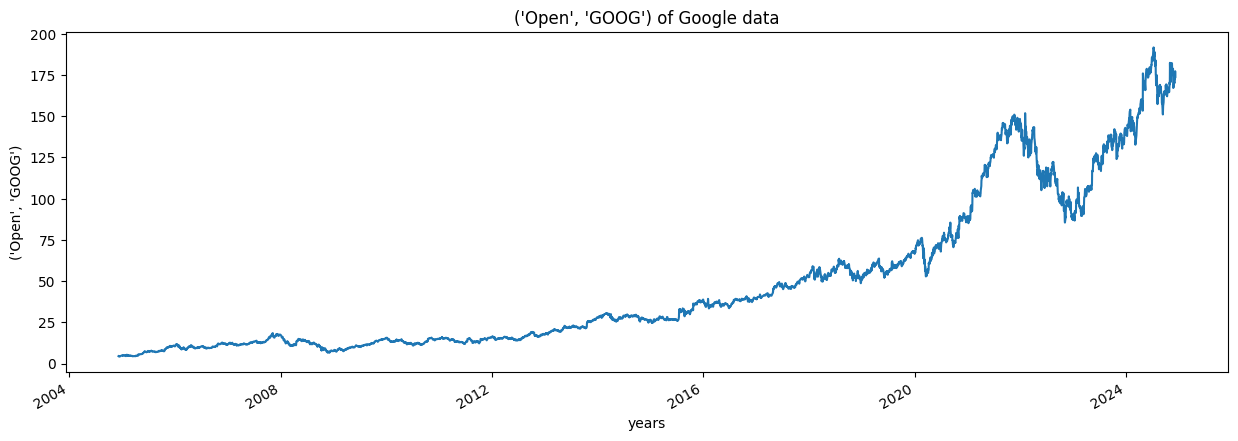

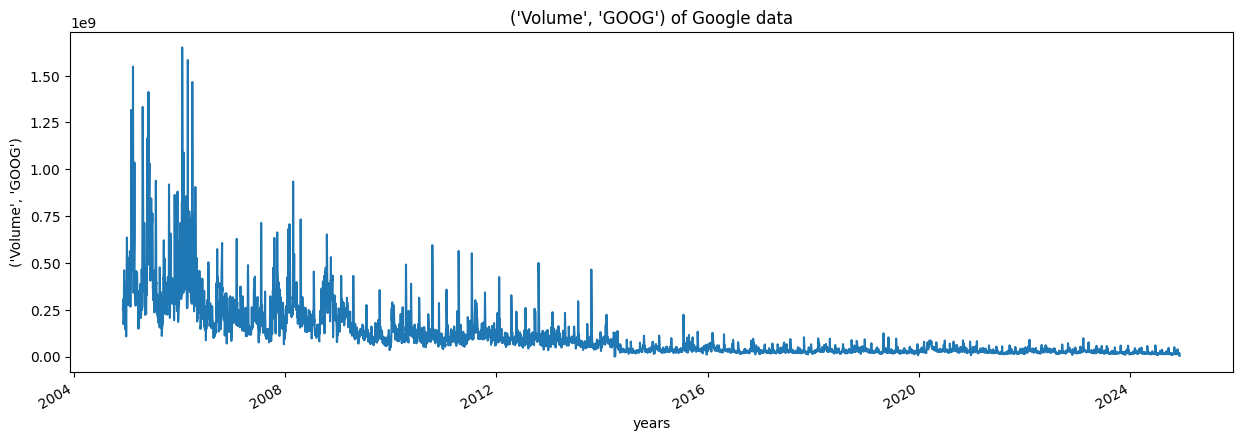

In [41]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [43]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [45]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [47]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [49]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 19
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 236


In [51]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [53]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-11-23 00:00:00+00:00         NaN
2005-11-25 00:00:00+00:00         NaN
2005-11-28 00:00:00+00:00         NaN
2005-11-29 00:00:00+00:00         NaN
2005-11-30 00:00:00+00:00    6.425723
Name: MA_for_250_days, dtype: float64

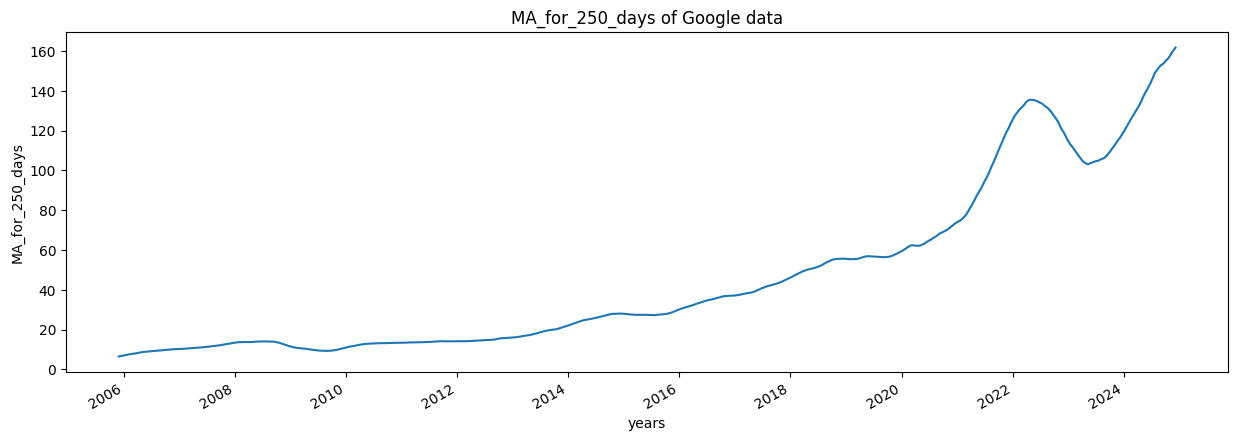

In [55]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

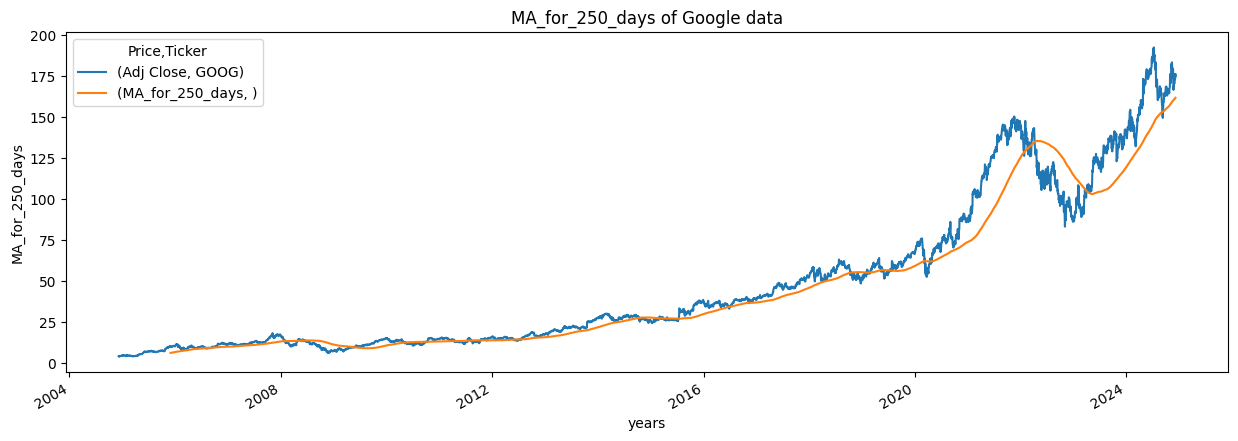

In [57]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

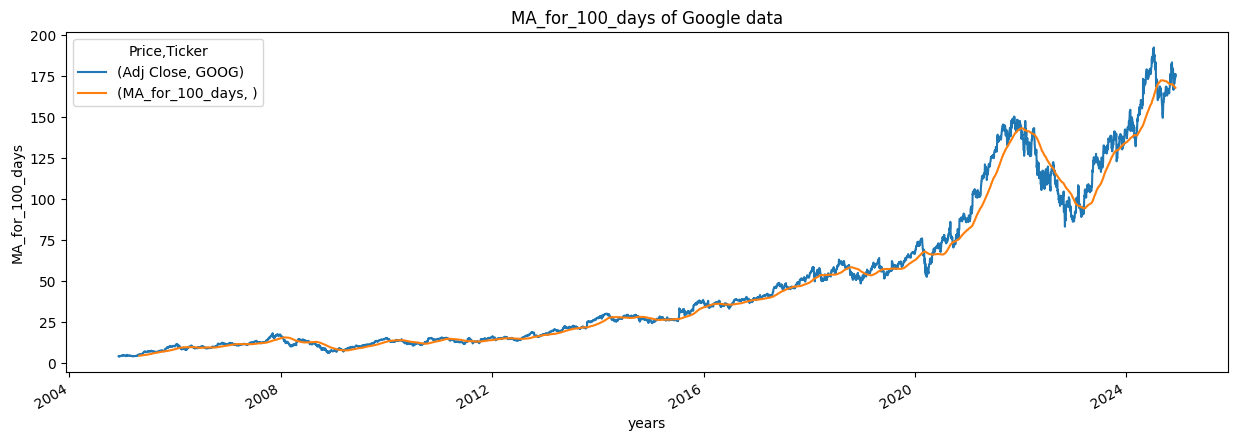

In [59]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

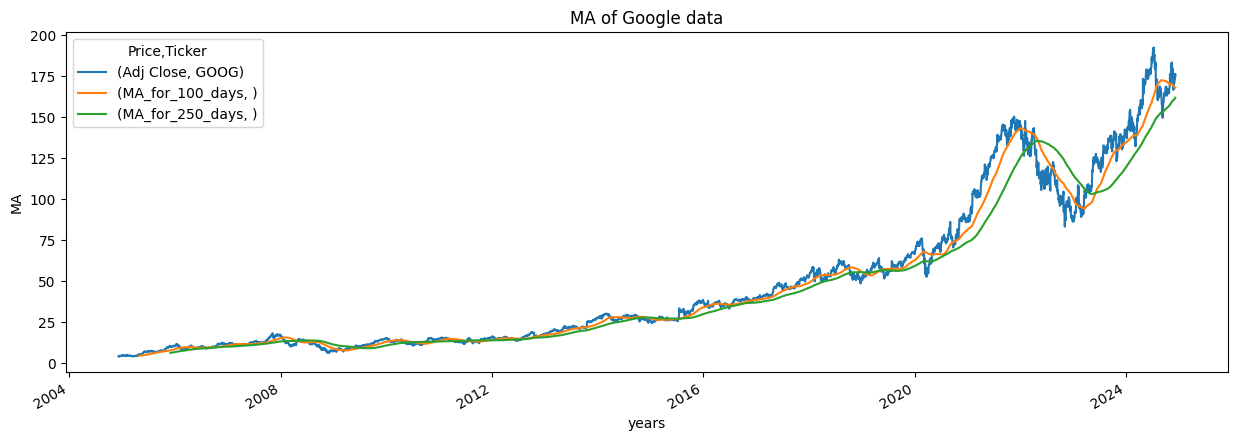

In [61]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [63]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-12-06 00:00:00+00:00,4.380035,NaN
2004-12-07 00:00:00+00:00,4.259285,-0.027568
2004-12-08 00:00:00+00:00,4.223259,-0.008458
2004-12-09 00:00:00+00:00,4.308977,0.020297
2004-12-10 00:00:00+00:00,4.264751,-0.010264


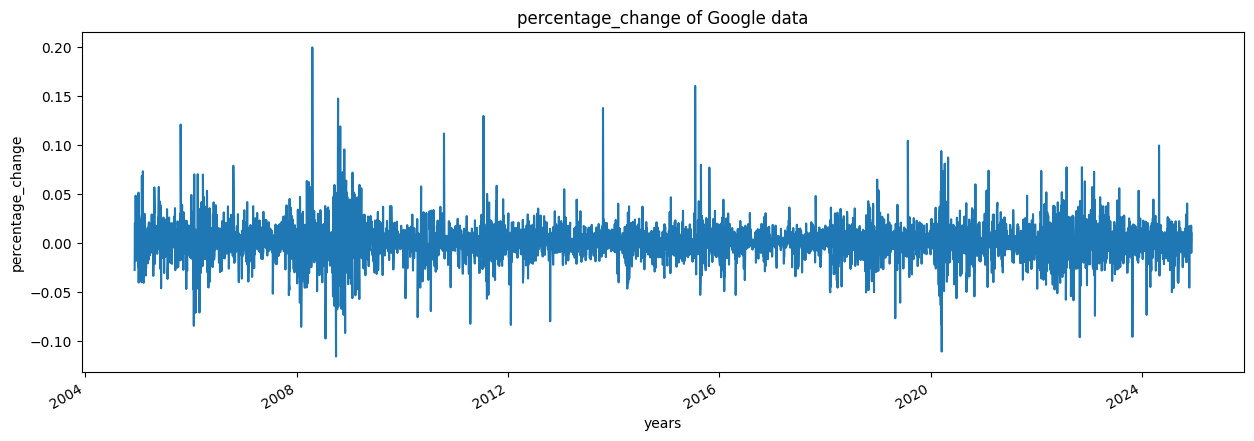

In [65]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [67]:
Adj_close_price = google_data[['Adj Close']]

In [69]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([4.22325945]))

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[8.33101636e-04],
       [1.91440843e-04],
       [0.00000000e+00],
       ...,
       [9.13293515e-01],
       [9.03834667e-01],
       [9.12841873e-01]])

In [73]:
len(scaled_data)

5036

In [75]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [77]:
x_data[0],y_data[0]

(array([[8.33101636e-04],
        [1.91440843e-04],
        [0.00000000e+00],
        [4.55500587e-04],
        [2.20486883e-04],
        [6.20525574e-05],
        [1.14997282e-03],
        [1.29388033e-03],
        [8.56867038e-04],
        [1.33348764e-03],
        [1.98571224e-03],
        [1.81803680e-03],
        [2.15471291e-03],
        [2.36595361e-03],
        [2.89539072e-03],
        [3.00761947e-03],
        [3.02610170e-03],
        [3.64663741e-03],
        [3.01157995e-03],
        [4.32130472e-03],
        [3.23734494e-03],
        [3.10663902e-03],
        [2.45177664e-03],
        [3.15152951e-03],
        [3.31128399e-03],
        [3.11059950e-03],
        [3.35353163e-03],
        [3.34693083e-03],
        [3.95954812e-03],
        [4.47841889e-03],
        [3.60702756e-03],
        [3.16076809e-03],
        [2.41612727e-03],
        [1.41799304e-03],
        [9.42690066e-04],
        [2.54287270e-03],
        [2.38972408e-03],
        [2.68810797e-03],
        [3.3

In [79]:

int(len(x_data)*0.7)

3455

In [81]:
4908-100-int(len(x_data)*0.7)

1353

In [83]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [85]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3455, 100, 1)
(3455, 1)
(1481, 100, 1)
(1481, 1)


In [93]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Input

In [95]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1],1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [97]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [99]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3455/3455 ━━━━━━━━━━━━━━━━━━━━ 105s 29ms/step - loss: 3.1683e-04
Epoch 2/2
3455/3455 ━━━━━━━━━━━━━━━━━━━━ 130s 38ms/step - loss: 5.5016e-05


In [101]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [103]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step


In [105]:
predictions

array([[0.26598296],
       [0.26328528],
       [0.26150092],
       ...,
       [0.8752818 ],
       [0.88352764],
       [0.88220817]], dtype=float32)

In [107]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 54.276855],
       [ 53.769196],
       [ 53.43341 ],
       ...,
       [168.93681 ],
       [170.48854 ],
       [170.24025 ]], dtype=float32)

In [109]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 53.39487457],
       [ 53.64675522],
       [ 53.56345749],
       ...,
       [176.08999634],
       [174.30999756],
       [176.00500488]])

In [111]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [113]:
rmse

2.9664970205331227

In [115]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-01-22 00:00:00+00:00,53.394875,54.276855
2019-01-23 00:00:00+00:00,53.646755,53.769196
2019-01-24 00:00:00+00:00,53.563457,53.433411
2019-01-25 00:00:00+00:00,54.415863,53.271965
2019-01-28 00:00:00+00:00,53.372925,53.678730


<Figure size 640x480 with 0 Axes>

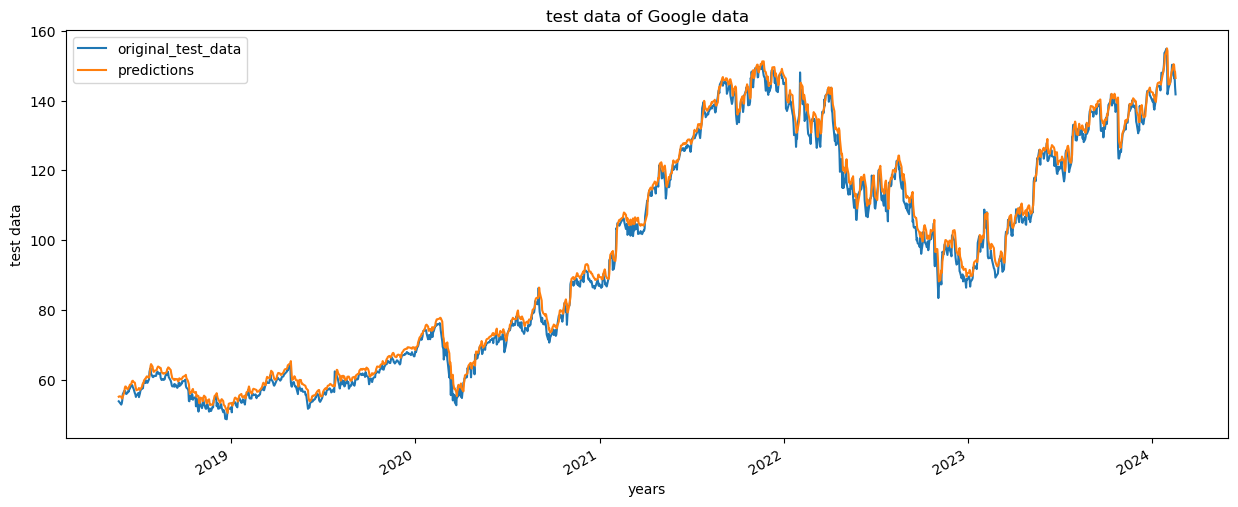

In [63]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

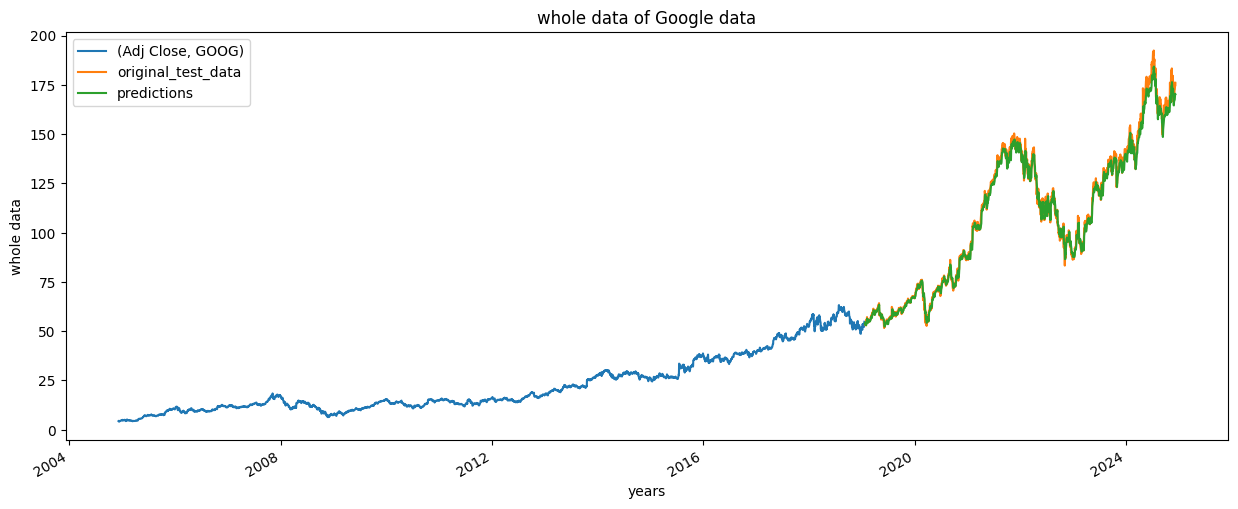

In [117]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [119]:
model.save("Latest_stock_price_model.keras")